In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import linregress
import seaborn as sns
import scipy.stats as st

In [2]:
# read CSV file into jupyter notebook
project_df=pd.read_csv("./Resources/Final_Data_Clean_Summary")
project_df

,Unnamed: 0,GDP,Total Miles,MPG,PAACD,PAACB,Year
0,0,15626.029,3031124,21.3,20.83,28034208.0,2007
1,1,15604.687,2976528,21.8,25.62,26630325.0,2008
2,2,15208.834,2956764,21.7,17.90,25814788.0,2009
3,3,15598.753,2967266,21.5,21.54,26190308.0,2010
4,4,15840.664,2950402,21.4,27.55,25785221.0,2011
5,5,16197.007,2969433,21.5,28.41,25272366.0,2012
6,6,16495.369,2988280,21.6,27.74,25650321.0,2013
7,7,16912.038,3025656,21.4,26.73,26034264.0,2014
8,8,17403.843,3095373,22.0,19.16,26420723.0,2015
9,9,17688.890,3174408,22.0,16.70,26958202.0,2016


In [3]:
# Droped unnecessary column

clean_df=project_df.drop('Unnamed: 0', axis=1)
clean_df

,GDP,Total Miles,MPG,PAACD,PAACB,Year
0,15626.029,3031124,21.3,20.83,28034208.0,2007
1,15604.687,2976528,21.8,25.62,26630325.0,2008
2,15208.834,2956764,21.7,17.90,25814788.0,2009
3,15598.753,2967266,21.5,21.54,26190308.0,2010
4,15840.664,2950402,21.4,27.55,25785221.0,2011
5,16197.007,2969433,21.5,28.41,25272366.0,2012
6,16495.369,2988280,21.6,27.74,25650321.0,2013
7,16912.038,3025656,21.4,26.73,26034264.0,2014
8,17403.843,3095373,22.0,19.16,26420723.0,2015
9,17688.890,3174408,22.0,16.70,26958202.0,2016


In [4]:
# Ran a correlation on entire datafram

clean_df.corr()

,GDP,Total Miles,MPG,PAACD,PAACB,Year
GDP,1.000000,0.896597,0.707174,-0.308445,0.226947,0.947161
Total Miles,0.896597,1.000000,0.779332,-0.617035,0.575169,0.753948
MPG,0.707174,0.779332,1.000000,-0.587381,0.249188,0.646506
PAACD,-0.308445,-0.617035,-0.587381,1.000000,-0.573050,-0.209868
PAACB,0.226947,0.575169,0.249188,-0.573050,1.000000,-0.066987
Year,0.947161,0.753948,0.646506,-0.209868,-0.066987,1.000000


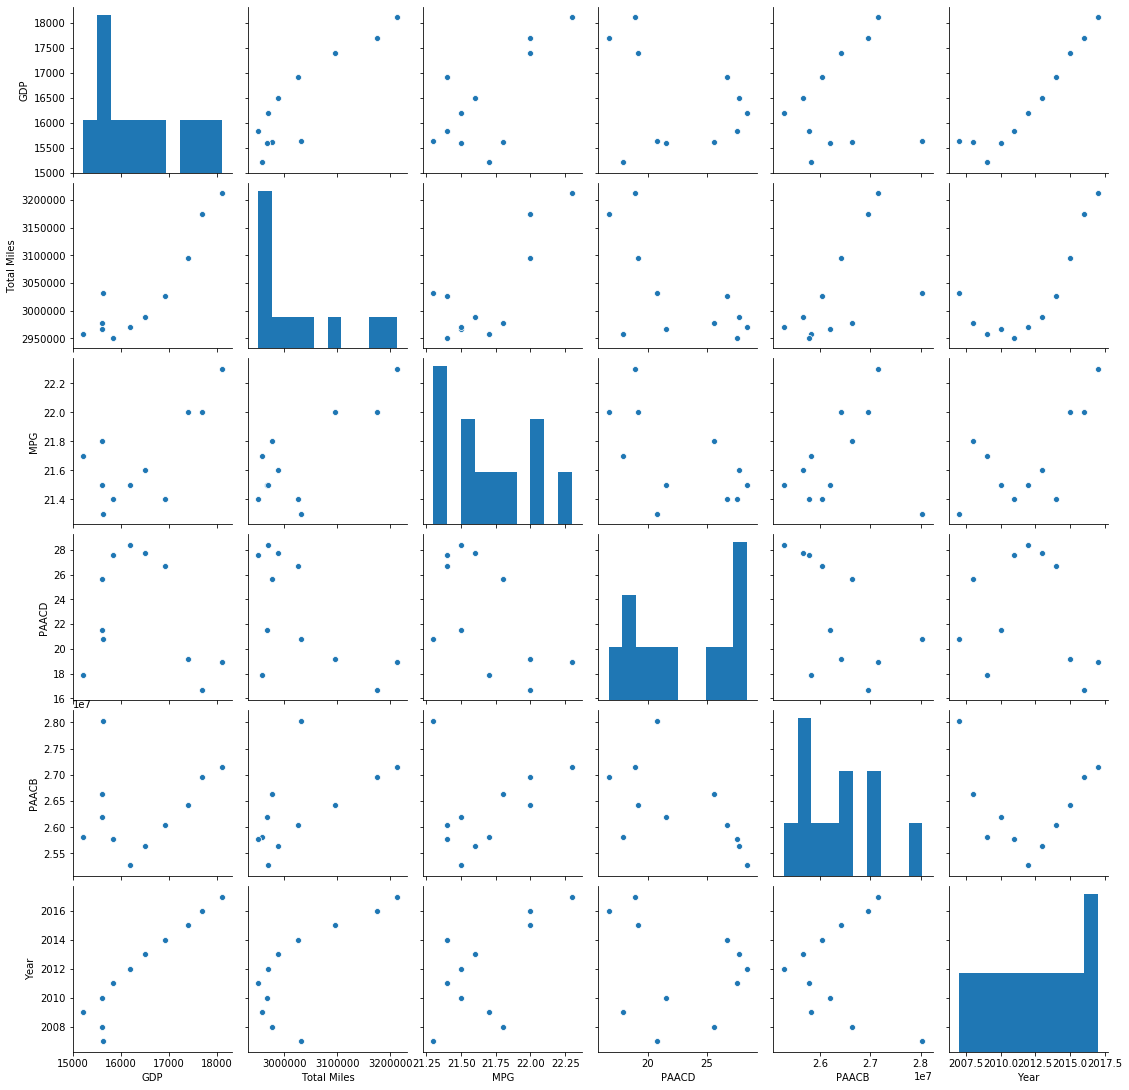

In [5]:
# ran a pairplot to see all possible scatter plots and histograms

sns.pairplot(clean_df)

plt.savefig("scatter_hist.png")

(array([1., 2., 1., 1., 1., 0., 0., 1., 1., 3.]),
 array([16.7  , 17.871, 19.042, 20.213, 21.384, 22.555, 23.726, 24.897,
        26.068, 27.239, 28.41 ]),
 <a list of 10 Patch objects>)

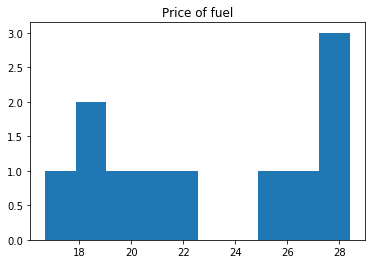

In [6]:
# Rand single histogram on price of fule

price=clean_df["PAACD"]

plt.title("Price of fuel")

plt.hist(price)



(array([3., 0., 2., 1., 1., 1., 0., 2., 0., 1.]),
 array([21.3, 21.4, 21.5, 21.6, 21.7, 21.8, 21.9, 22. , 22.1, 22.2, 22.3]),
 <a list of 10 Patch objects>)

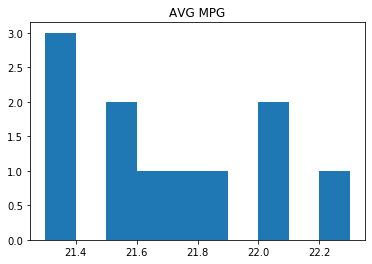

In [7]:
# Ran single histogram on avg mpg

mpg=clean_df["MPG"]

plt.title("AVG MPG")

plt.hist(mpg)

(array([1., 3., 1., 1., 1., 1., 0., 1., 1., 1.]),
 array([15208.834 , 15498.7588, 15788.6836, 16078.6084, 16368.5332,
        16658.458 , 16948.3828, 17238.3076, 17528.2324, 17818.1572,
        18108.082 ]),
 <a list of 10 Patch objects>)

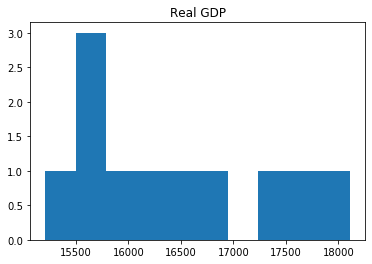

In [8]:
# Ran hist on GDP

gdp=clean_df["GDP"]

plt.title("Real GDP")

plt.hist(gdp)

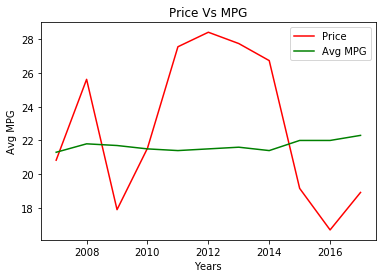

In [130]:
# Ran a line graph on price and avg mpg to see if there is a relationship

years=clean_df["Year"]

plt.plot(years, price, color="red", label="Price")

plt.plot(years, mpg, color="green", label="Avg MPG")

plt.legend(loc="best")

plt.title("Price Vs MPG")
plt.xlabel("Years")
plt.ylabel("Avg MPG")
           
           
           
plt.savefig("line_mpg.png")          
           
plt.show()

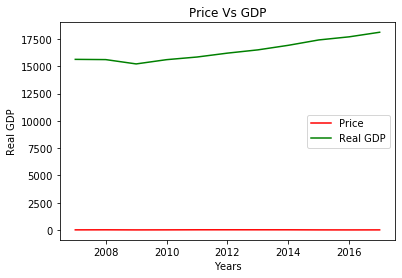

In [44]:
# Ran line graph on price and GDP

years=clean_df["Year"]

plt.plot(years, price, color="red", label="Price")

plt.plot(years, gdp, color="green", label="Real GDP")

plt.legend(loc="best")

plt.title("Price Vs GDP")
plt.xlabel("Years")
plt.ylabel("Real GDP")

plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

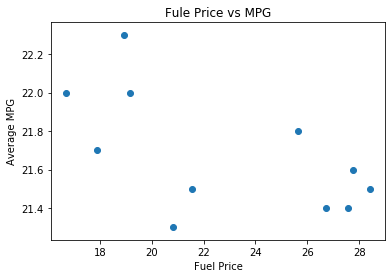

In [73]:
# Ran scatter plot on price and mpg

plt.scatter(price,mpg)

plt.title("Fule Price vs MPG")
plt.xlabel('Fuel Price')
plt.ylabel('Average MPG')

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

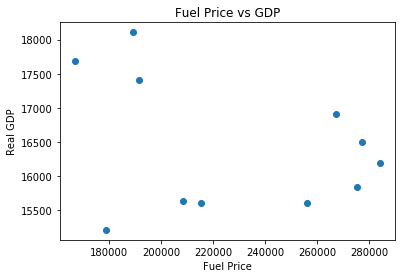

In [72]:
# Ran scatter on price and GDP, scaling price to level of GDP

plt.scatter((price*10000),gdp)

plt.title("Fuel Price vs GDP")
plt.xlabel('Fuel Price')
plt.ylabel('Real GDP')

plt.show

(-0.5873811164305379, 0.05742288782968133)


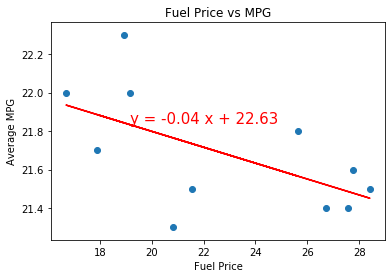

In [131]:
# Ran a regression on price and mpg

(slope, intercept, rvalue, pvalue, stderr)= linregress(price,mpg)
regress_values= price * slope + intercept
line_eq= f"y = {round(slope,2)} x + {round(intercept,2)}"
plt.scatter(price,mpg)
# plt.plot(grouped_cap["Weight (g)"],regress_values,"r-")
plt.plot(price,regress_values,"r-")
plt.annotate(line_eq,(clean_df["PAACD"][8],regress_values[10]),fontsize=15,color="red")
correlation = st.pearsonr(price,mpg)


plt.title("Fuel Price vs MPG")
plt.xlabel('Fuel Price')
plt.ylabel('Average MPG')

print(correlation)

plt.savefig("regress_mpg.png")

plt.show()

(-0.3084448074362488, 0.35608775630990774)


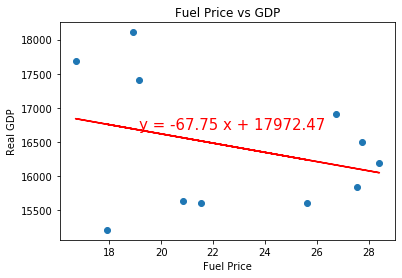

In [132]:
# Ran regression on price and GDP 

(slope, intercept, rvalue, pvalue, stderr)= linregress(price,gdp)
regress_values= price * slope + intercept
line_eq= f"y = {round(slope,2)} x + {round(intercept,2)}"
plt.scatter(price,gdp)
# plt.plot(grouped_cap["Weight (g)"],regress_values,"r-")
plt.plot(price,regress_values,"r-")
plt.annotate(line_eq,(clean_df["PAACD"][8],regress_values[10]),fontsize=15,color="red")
correlation = st.pearsonr(price,gdp)

plt.title("Fuel Price vs GDP")
plt.xlabel('Fuel Price')
plt.ylabel('Real GDP')


print(correlation)


plt.savefig("regress_gdp.png")

plt.show()

In [97]:
# Ran t-test to find P-value of price and mpg

t_test_mpg= st.ttest_ind(price,mpg, equal_var=False)
t_test_mpg

Ttest_indResult(statistic=0.8542111787760883, pvalue=0.41279157416942314)

In [99]:
# Ran t-test fo find P-value of price and GDP

t_test_gdp= st.ttest_ind(price,gdp, equal_var=False)
t_test_gdp

Ttest_indResult(statistic=-55.82442304882722, pvalue=8.24223635226698e-14)

In [112]:
# Scaled all variables so we could view line graphs relationship

price2=(price*1000)
mpg2=(mpg*1000)
tot_mile2=clean_df["Total Miles"]/100
con2=clean_df["PAACB"]/1000

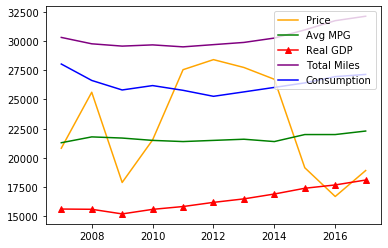

In [133]:
# Ran line graph on all variables


years=clean_df["Year"]

# fig, ax = plt.subplots(1,3)

# fig.set_size_inches(16,3)

# ax[0].plot(years, price, color="red", label="Price")

# ax[1].plot(years, mpg, color="green", label="Avg MPG")

# ax[2].plot(years, gdp, color="orange", label="Real GDP")


plt.plot(years, price2, color="orange", label="Price")

plt.plot(years, mpg2, color="green", label="Avg MPG")

plt.plot(years, gdp, color="red", label="Real GDP", marker="^")

plt.plot(years,tot_mile2 , color="purple", label="Total Miles")

plt.plot(years, con2, color="blue", label="Consumption")

plt.legend(loc="upper right")

# plt.title("Price Vs MPG")
# plt.xlabel("Years")
# plt.ylabel("Avg MPG")

plt.savefig("line_all.png")
plt.show()